# Exercise: Linear Regression

Implementing Linear Regression on a [advertising dataset](https://www.statlearning.com/s/Advertising.csv) where _TV_, _radio_ and _newspaper_ are adevertising mediums(input varaibles) and _sales_ is output varaible. 

In [8]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"

# Read csv_data using pandas df 
df = pd.read_csv(data_path, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


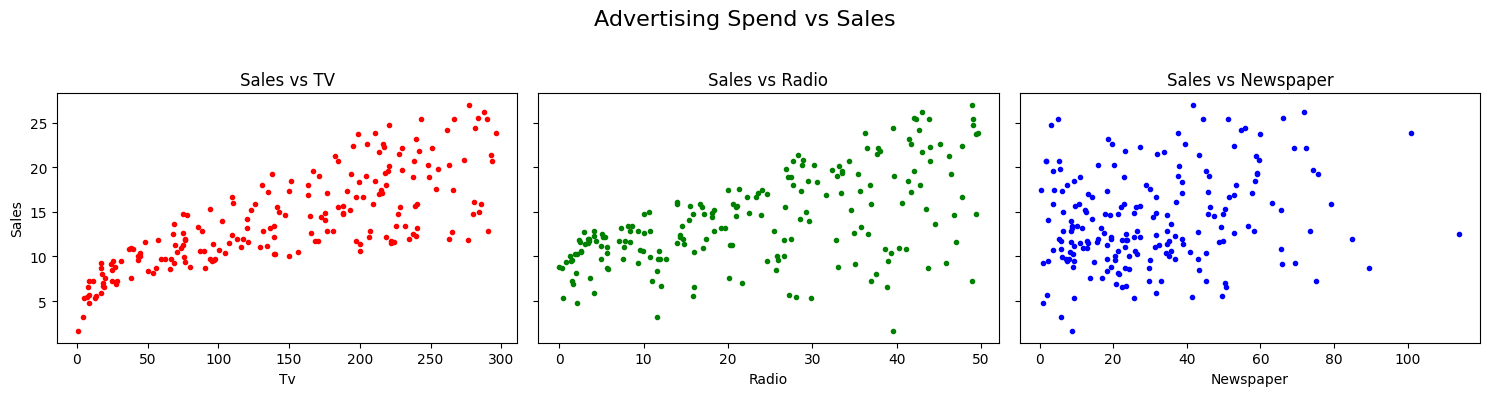

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['red', 'green', 'blue']
titles = ['Sales vs TV', 'Sales vs Radio', 'Sales vs Newspaper']
columns = ['TV', 'radio', 'newspaper']

for ax, color, title, column in zip(axs, colors, titles, columns):
    ax.scatter(df[column], df["sales"], color=color, marker=".")
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel("Sales" if column == 'TV' else "")
    ax.set_title(title)

fig.suptitle('Advertising Spend vs Sales', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the first and second plot, we can see that there is sharp upward trend in the no of units sold as TV and radio advertising increases. However, for newspaper there seems no relationship between its advertisement and units sold.  

### Linear Regression with OLS

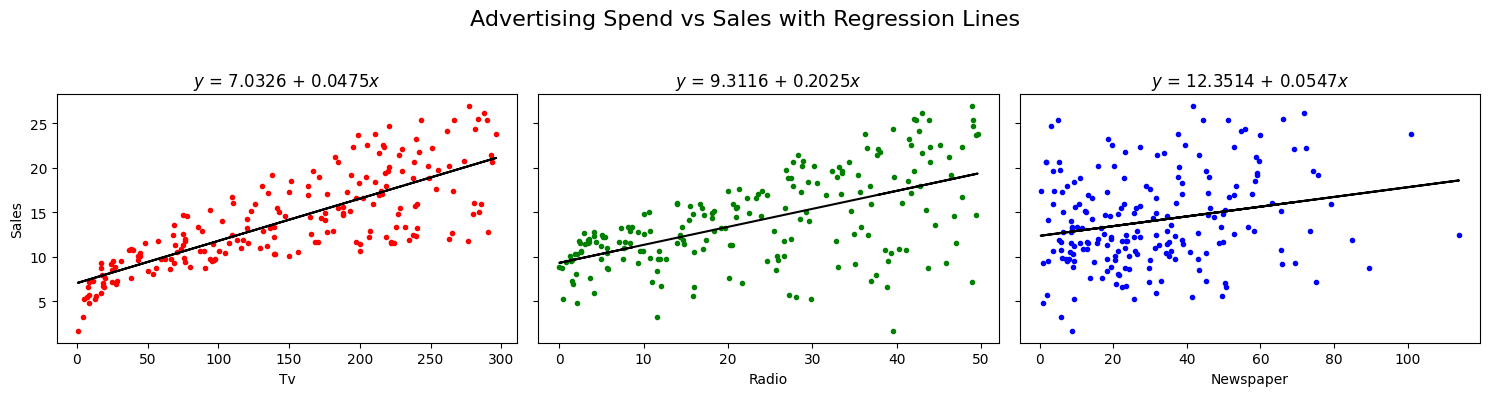

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['red', 'green', 'blue']
columns = ['TV', 'radio', 'newspaper']

# Function for training model and plotting
def train_plot(data_df, feature, ax, c):
    # Initializing our inputs and outputs
    X = data_df[[feature]].values
    Y = data_df["sales"].values

    # Creating and training the model
    model = LinearRegression()
    model.fit(X, Y)

    # Predicting sales
    y_hat = model.predict(X)

    # Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Sales" if feature == "TV" else "")
    ax.set_title(f"$y$ = {model.intercept_:.4f} + {model.coef_[0]:.4f}$x$")

# Plotting each feature against sales
for ax, color, column in zip(axs, colors, columns):
    train_plot(df, column, ax, color)

fig.suptitle('Advertising Spend vs Sales with Regression Lines', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()